In [1]:
# create a YOY RPI prediction using sarimax
#1. import the correct df from gcp
#2. follow the previous code.
!pwd

/home/nasonn/code/Nathansonn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
final_df = pd.read_csv('inflation_prediction/notebooks/final_df_inc_YOY.csv',index_col=1)  
final_df.drop(columns='Unnamed: 0', inplace=True)
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY
Date,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693


In [5]:
final_df.index = pd.to_datetime(final_df.index)

In [6]:
RPI_YOY_df = final_df[['RPI YOY']].copy()
RPI_YOY_df

,RPI YOY
Date,
2009-01-01,0.142993
2009-02-01,0.000000
2009-03-01,-0.377181
2009-04-01,-1.168224
2009-05-01,-1.069270
...,...
2022-05-01,11.659490
2022-06-01,11.842105
2022-07-01,12.340426


In [7]:
dataframes1 = {}
est_frames1 = {}

for i in range(8):
    year = 10 + i
    dataframes1[f'df_RPI_{year}_{year+5}'] = RPI_YOY_df[(year-9)*12:(year-9)*12+60]
    dataframes1[f'df_RPI_{year+5}_{year+6}'] = RPI_YOY_df[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames1[f'df_RPI_{year+5}_{year+6}'] = dataframes1[f'df_RPI_{year+5}_{year+6}']
dataframes1

{'df_RPI_10_15':              RPI YOY
 Date                
 2010-01-01  3.712518
 2010-02-01  3.689688
 2010-03-01  4.448651
 2010-04-01  5.342790
 2010-05-01  5.075188
 2010-06-01  5.014058
 2010-07-01  4.779756
 2010-08-01  4.710821
 2010-09-01  4.644682
 2010-10-01  4.537037
 2010-11-01  4.709141
 2010-12-01  4.770642
 2011-01-01  5.094080
 2011-02-01  5.520073
 2011-03-01  5.346624
 2011-04-01  5.206463
 2011-05-01  5.187835
 2011-06-01  4.953146
 2011-07-01  4.964222
 2011-08-01  5.167038
 2011-09-01  5.592543
 2011-10-01  5.403012
 2011-11-01  5.158730
 2011-12-01  4.816112
 2012-01-01  3.930131
 2012-02-01  3.718115
 2012-03-01  3.569892
 2012-04-01  3.455631
 2012-05-01  3.061224
 2012-06-01  2.806122
 2012-07-01  3.152961
 2012-08-01  2.922490
 2012-09-01  2.648172
 2012-10-01  3.193277
 2012-11-01  2.976939
 2012-12-01  3.091061
 2013-01-01  3.277311
 2013-02-01  3.209671
 2013-03-01  3.280731
 2013-04-01  2.886598
 2013-05-01  3.135314
 2013-06-01  3.267163
 2013-07-01  3.1

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


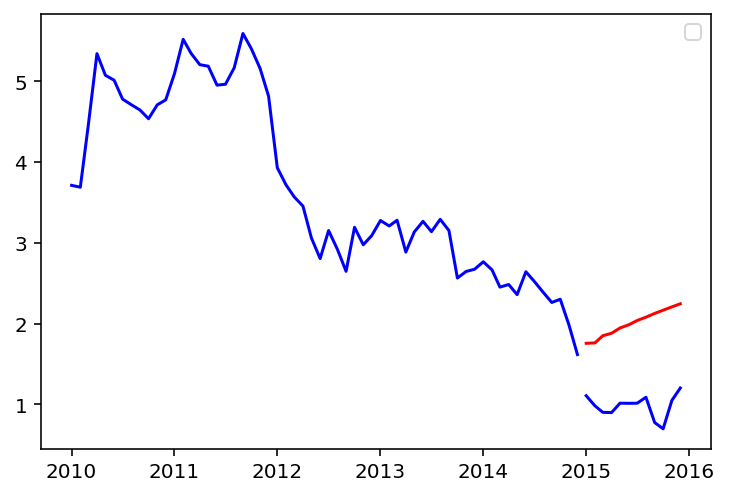

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

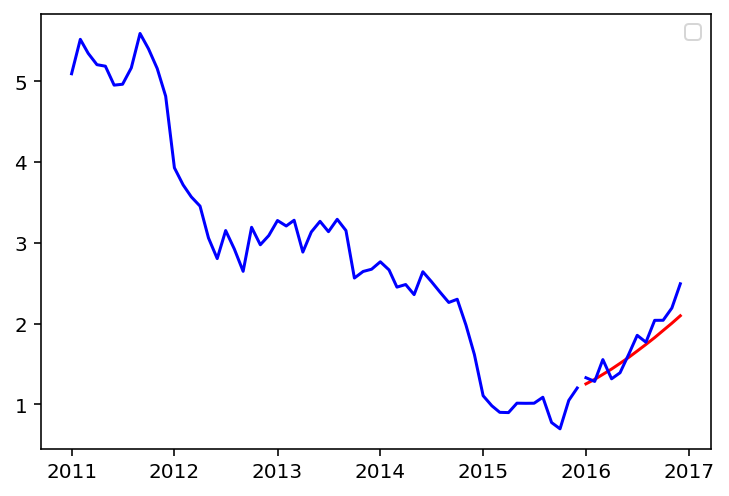

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

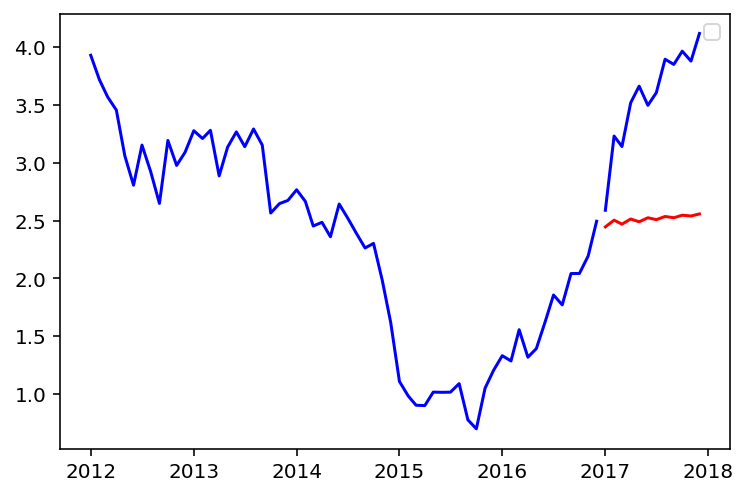

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

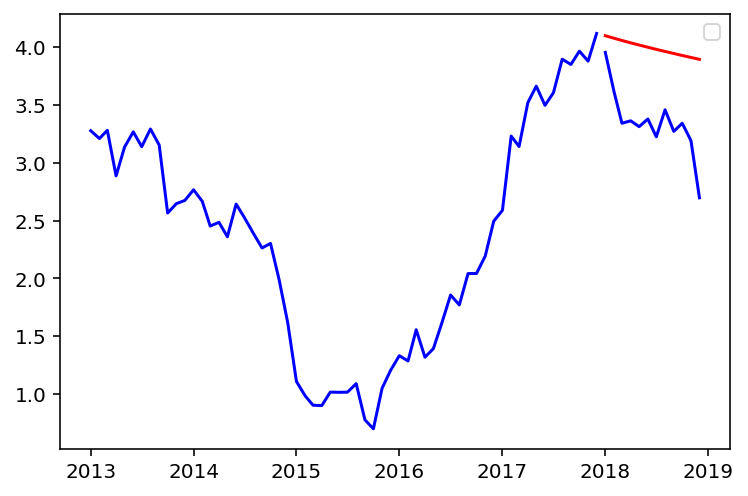

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

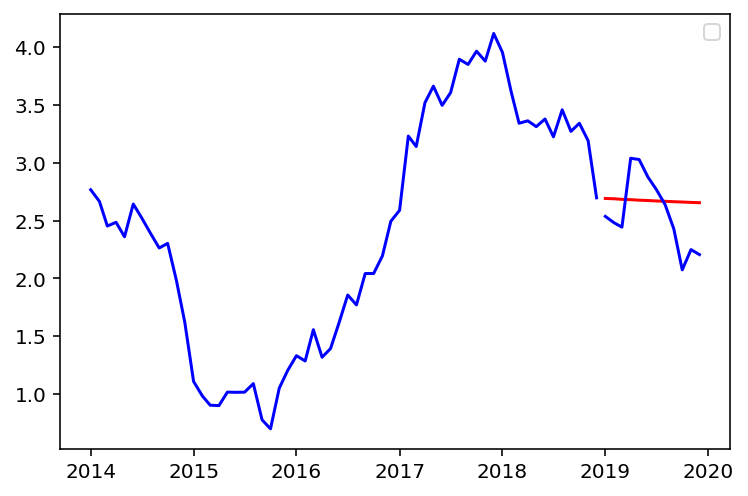

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

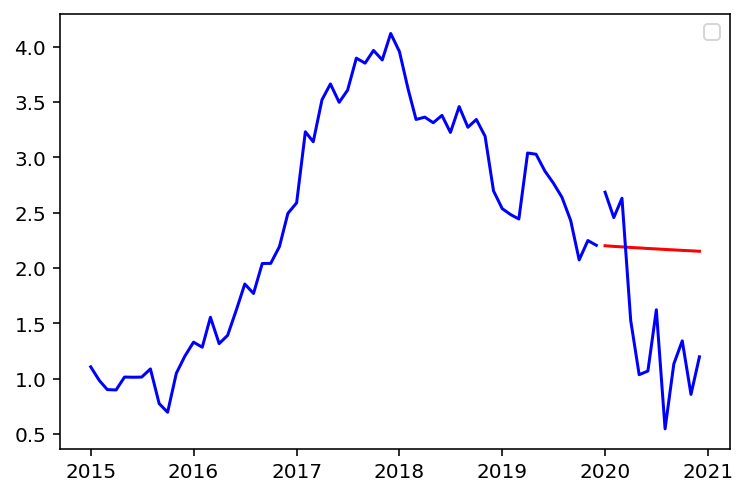

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


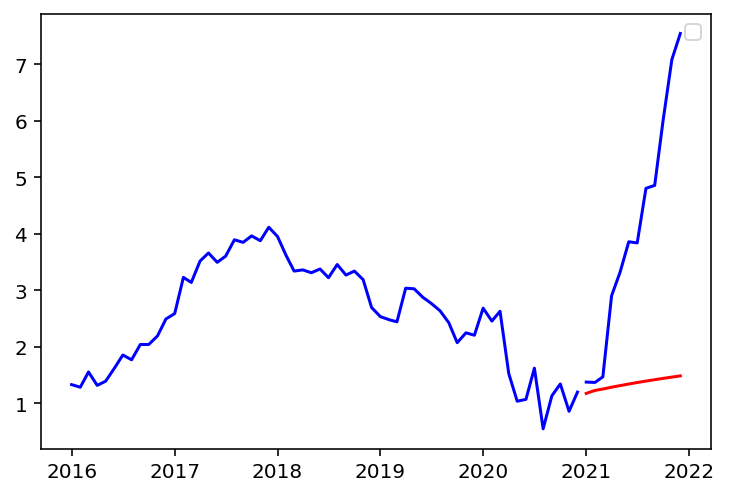

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

ValueError: x and y must have same first dimension, but have shapes (9,) and (12,)

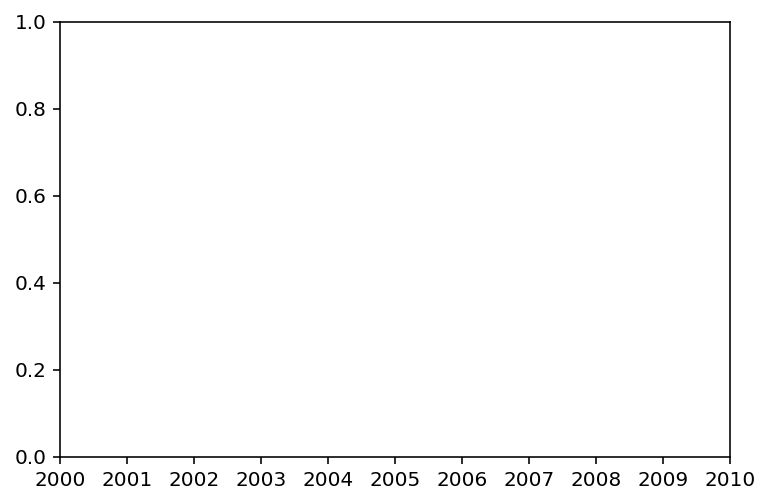

In [8]:
mape_list = []
YOY_error_0_list = []

for i in range(8):
    year = 10 + i
    df5y = dataframes1[f'df_RPI_{year}_{year+5}']
    df5y1y = dataframes1[f'df_RPI_{year+5}_{year+6}']
    
    model=sm.tsa.arima.ARIMA(df5y,order=(2, 0, 1))
    
    results=model.fit()

    abc = results.predict(start=60,end=71,dynamic=True)
    aaa = pd.DataFrame(abc)
    est_frames1[f'df_RPI_{year+5}_{year+6}'] = aaa.copy()

    fig1 = plt.plot(df5y1y.index,aaa['predicted_mean'], 'r')
    fig2 = plt.plot(df5y1y, 'b')
    fig3 = plt.plot(df5y, 'b')
    plt.legend()
    plt.show()

    mape = 0
    YOY_error_0 = 0
    for i in range(12):
        if i == 0:
            YOY_error_0 = (aaa[['predicted_mean']].iloc[i,0]/df5y.iloc[49,0]) - (df5y1y.iloc[i,0]/df5y.iloc[49,0]) 
        mape = (mape + abs((aaa[['predicted_mean']].iloc[i,0]/df5y1y.iloc[i,0]) - 1))
        mape = mape/12
    mape_list.append(mape)
    YOY_error_0_list.append(YOY_error_0)
    

In [9]:
mape

0.07291675043776698

In [10]:
final_df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_gas,BPSW2 TRPU Curncy,BPSW10 TRPU Curncy,CPI,RPI,Nationwide_HPI,RPI YOY,ng_YOY,Brent_Crude_YOY,Nationwide_HPI_YOY
Date,,,,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.733286,84.9,210.1,300.2,0.142993,NaN,NaN,NaN
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.758714,85.6,211.4,294.7,0.000000,NaN,NaN,NaN
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.760136,85.8,211.3,301.1,-0.377181,NaN,NaN,NaN
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.819600,86.0,211.5,302.9,-1.168224,NaN,NaN,NaN
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.873900,86.4,212.8,307.2,-1.069270,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,120.8,337.1,538.4,11.659490,247.890034,83.864024,11.147812
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,121.8,340.0,541.8,11.842105,258.900656,79.674222,10.661765
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,122.5,343.2,541.0,12.340426,343.541804,58.346674,11.042693


In [11]:
ng_YOY_df = final_df[['ng_YOY']]
ng_YOY_df_2010 = ng_YOY_df.iloc[12:]

In [12]:
RPI_YOY_df_2010 = RPI_YOY_df.iloc[12:]
RPI_YOY_df_2010

,RPI YOY
Date,
2010-01-01,3.712518
2010-02-01,3.689688
2010-03-01,4.448651
2010-04-01,5.342790
2010-05-01,5.075188
...,...
2022-05-01,11.659490
2022-06-01,11.842105
2022-07-01,12.340426


In [13]:
dataframes2 = {}
est_frames2 = {}

for i in range(8):
    year = 9 + i
    dataframes2[f'df_RPI_YOY{year+1}_{year+6}'] = RPI_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes2[f'df_RPI_YOY{year+6}_{year+7}'] = RPI_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames2[f'df_RPI_YOY{year+6}_{year+7}'] = dataframes2[f'df_RPI_YOY{year+6}_{year+7}']
dataframes2

{'df_RPI_YOY10_15':              RPI YOY
 Date                
 2010-01-01  3.712518
 2010-02-01  3.689688
 2010-03-01  4.448651
 2010-04-01  5.342790
 2010-05-01  5.075188
 2010-06-01  5.014058
 2010-07-01  4.779756
 2010-08-01  4.710821
 2010-09-01  4.644682
 2010-10-01  4.537037
 2010-11-01  4.709141
 2010-12-01  4.770642
 2011-01-01  5.094080
 2011-02-01  5.520073
 2011-03-01  5.346624
 2011-04-01  5.206463
 2011-05-01  5.187835
 2011-06-01  4.953146
 2011-07-01  4.964222
 2011-08-01  5.167038
 2011-09-01  5.592543
 2011-10-01  5.403012
 2011-11-01  5.158730
 2011-12-01  4.816112
 2012-01-01  3.930131
 2012-02-01  3.718115
 2012-03-01  3.569892
 2012-04-01  3.455631
 2012-05-01  3.061224
 2012-06-01  2.806122
 2012-07-01  3.152961
 2012-08-01  2.922490
 2012-09-01  2.648172
 2012-10-01  3.193277
 2012-11-01  2.976939
 2012-12-01  3.091061
 2013-01-01  3.277311
 2013-02-01  3.209671
 2013-03-01  3.280731
 2013-04-01  2.886598
 2013-05-01  3.135314
 2013-06-01  3.267163
 2013-07-01  

In [14]:
dataframes3 = {}
est_frames3 = {}

for i in range(8):
    year = 9 + i
    dataframes3[f'df_ng_YOY{year+1}_{year+6}'] = ng_YOY_df_2010[(year-9)*12:(year-9)*12+60]
    dataframes3[f'df_ng_YOY{year+6}_{year+7}'] = ng_YOY_df_2010[(year-9)*12+60:(year-9)*12+72]
#     placeholder for est_frames here ... will be overwritten once we have estimates
    est_frames3[f'df_ng_YOY{year+6}_{year+7}'] = dataframes3[f'df_ng_YOY{year+6}_{year+7}']
dataframes3

{'df_ng_YOY10_15':                ng_YOY
 Date                 
 2010-01-01 -24.470363
 2010-02-01   2.588071
 2010-03-01  10.795657
 2010-04-01  19.494994
 2010-05-01  41.778599
 2010-06-01  66.151094
 2010-07-01  89.623008
 2010-08-01  81.386120
 2010-09-01  61.538993
 2010-10-01  52.097535
 2010-11-01  74.917154
 2010-12-01  63.021044
 2011-01-01  50.048736
 2011-02-01  42.094988
 2011-03-01  67.953609
 2011-04-01  52.604576
 2011-05-01  30.818082
 2011-06-01  14.629593
 2011-07-01  18.361058
 2011-08-01  25.404346
 2011-09-01  32.303446
 2011-10-01  30.998194
 2011-11-01  26.697035
 2011-12-01  14.115332
 2012-01-01   4.148653
 2012-02-01  10.883630
 2012-03-01   4.146586
 2012-04-01   9.038873
 2012-05-01   7.180272
 2012-06-01   7.160412
 2012-07-01  10.848994
 2012-08-01  10.960689
 2012-09-01   2.177853
 2012-10-01   7.583514
 2012-11-01  10.483063
 2012-12-01   9.679251
 2013-01-01  13.301285
 2013-02-01  10.362302
 2013-03-01  13.186160
 2013-04-01  11.728564
 2013-05-01  12.

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertibl

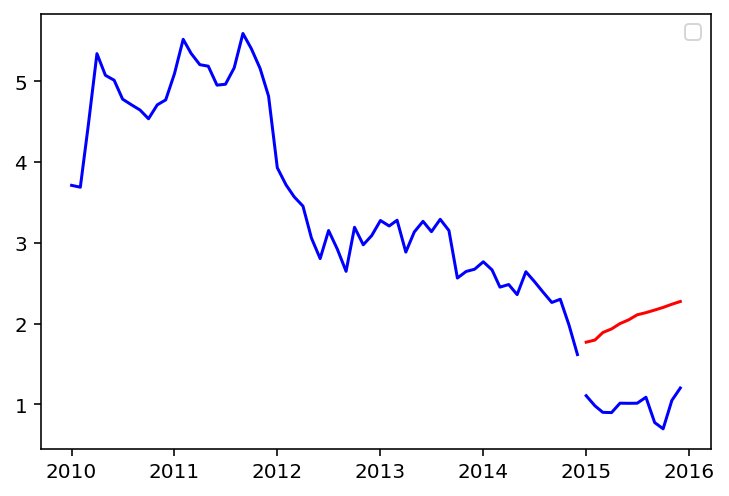

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

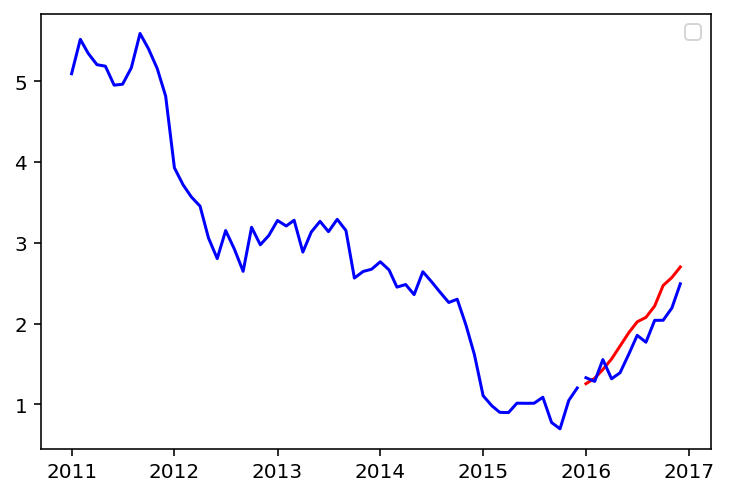

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

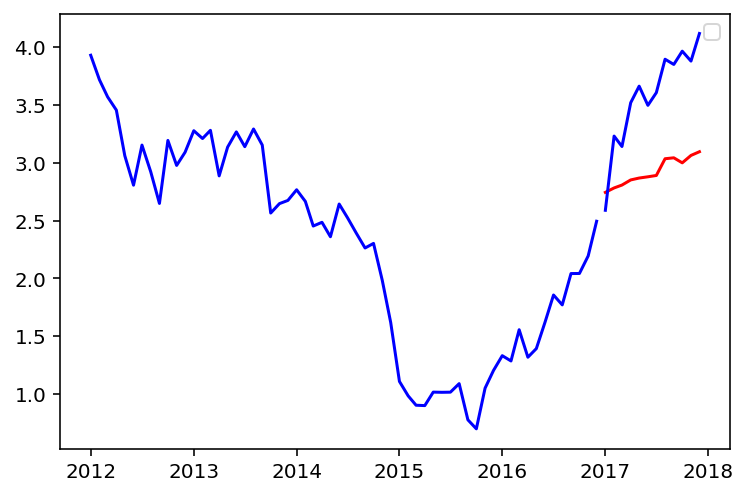

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

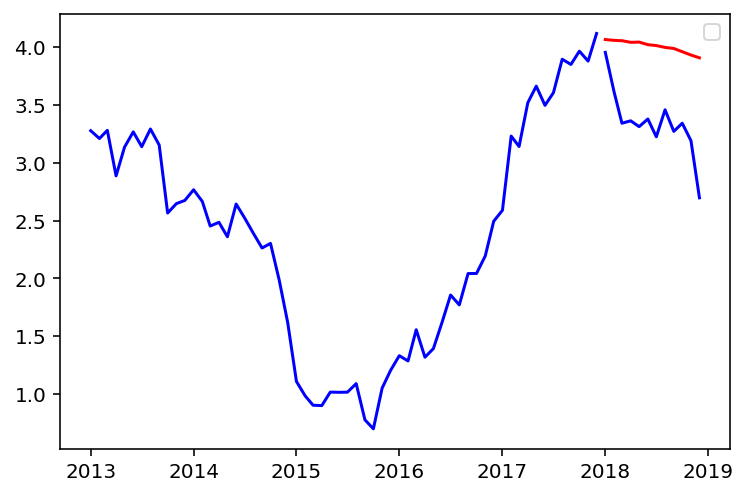

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

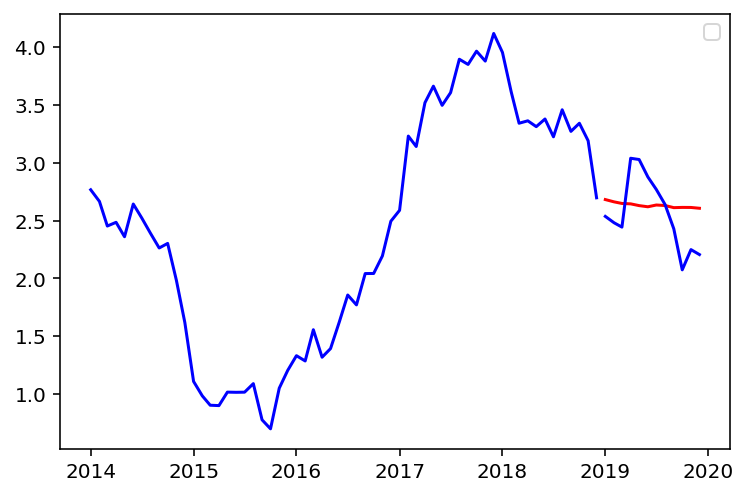

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

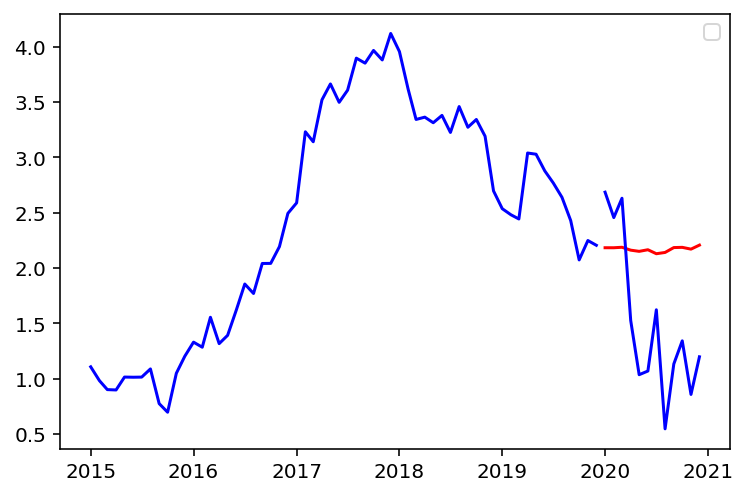

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

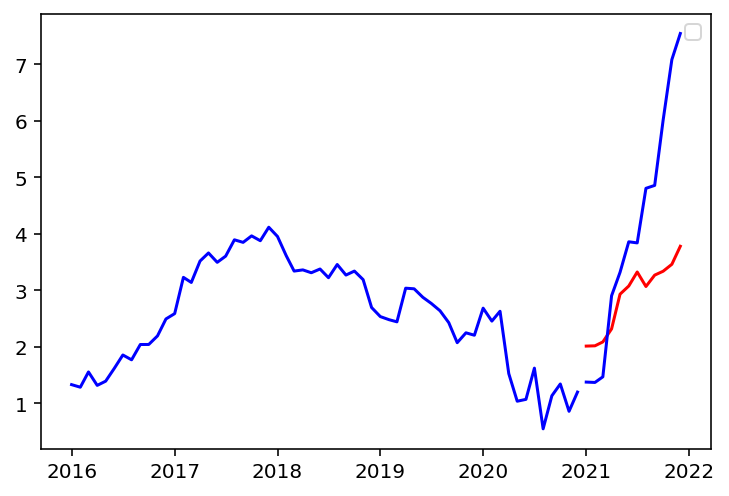

/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/nasonn/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

ValueError: Provided exogenous values are not of the appropriate shape. Required (12, 1), got (9, 1).

In [17]:
mape_list = []
YOY_error_0_list = []

for i in range(8):
    year = 9 + i
    df5y = dataframes2[f'df_RPI_YOY{year+1}_{year+6}']
    df5y1y = dataframes2[f'df_RPI_YOY{year+6}_{year+7}']
    df5yng = dataframes3[f'df_ng_YOY{year+1}_{year+6}']
    df5yng1y = dataframes3[f'df_ng_YOY{year+6}_{year+7}']
    
    model=sm.tsa.arima.ARIMA(df5y,exog=df5yng,order=(2, 0, 1))
    
    results=model.fit()

    abc = results.predict(start=60,end=71,dynamic=True, exog=df5yng1y)
    aaa = pd.DataFrame(abc)
    est_frames3[f'df_RPI_{year+5}_{year+6}'] = aaa.copy()

    fig1 = plt.plot(df5y1y.index,aaa['predicted_mean'], 'r')
    fig2 = plt.plot(df5y1y, 'b')
    fig3 = plt.plot(df5y, 'b')
    plt.legend()
    plt.show()

    mape = 0
    YOY_error_0 = 0
    for i in range(12):
        if i == 0:
            YOY_error_0 = (aaa[['predicted_mean']].iloc[i,0]/df5y.iloc[49,0]) - (df5y1y.iloc[i,0]/df5y.iloc[49,0]) 
        mape = (mape + abs((aaa[['predicted_mean']].iloc[i,0]/df5y1y.iloc[i,0]) - 1))
        mape = mape/12
    mape_list.append(mape)
    YOY_error_0_list.append(YOY_error_0)

In [18]:
mape

0.045415096257525635

In [19]:
# mape has decreased from 7% to 4% but does not compete with the already existing sarimax model which has mape roughly 0.5%